## Gustavo Villar
## Final Project STAT 724

#### Firstly, I will import the necessary packages for our exploratory analysis. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error


import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score
import sklearn.linear_model as skl_lm


In [2]:
data = pd.read_csv(r'C:\Users\Gusta\Downloads\2019MPG.csv')

Skewness:1.51665542684814 
Kurtosis: 4.777347777117271


Text(0.5, 1.0, 'Distribution of Combined MPG')

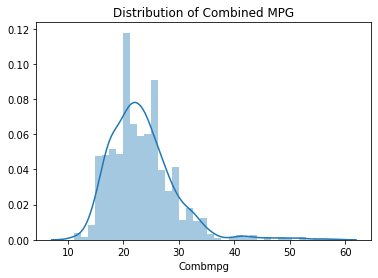

In [3]:
# Exploratory Data Analysis
# Here we will create a distribution plot for our response variable. 
print("Skewness:{} \nKurtosis: {}".format(data['Combmpg'].skew(), data["Combmpg"].kurt()))
sns.distplot(data["Combmpg"]).set_title('Distribution of Combined MPG')

#### I will inspect some of the categorical variables just to see what we are dealing with.
#### I will then factorize all the categorical variables to have dummy variables. 

In [4]:
uniqueValues = data['DriveDesc'].unique()
print(uniqueValues)

['All Wheel Drive' '2-Wheel Drive, Rear' 'Part-time 4-Wheel Drive'
 '2-Wheel Drive, Front' '4-Wheel Drive']


In [5]:
uniqueValues2 = data['AirAspirationMethodDesc'].unique()
print(uniqueValues2)

['Turbocharged' 'Supercharged' 'Naturally Aspirated' 'Other'
 'Turbocharged+Supercharged']


In [6]:
uniqueValues3 = data['FuelUsageDesc'].unique()
print(uniqueValues3)

['Gasoline (Premium Unleaded Required)'
 'Gasoline (Premium Unleaded Recommended)'
 'Gasoline (Regular Unleaded Recommended)'
 'Diesel, ultra low sulfur (15 ppm, maximum)'
 'Gasoline (Mid Grade Unleaded Recommended)']


In [7]:
uniqueValues4 = data['CarlineClassDesc'].unique()
print(uniqueValues4)

['Two Seaters' 'Minicompact Cars' 'Subcompact Cars' 'Compact Cars'
 'Midsize Cars' 'Large Cars' 'Small Station Wagons'
 'Midsize Station Wagons' 'Small Pick-up Trucks 2WD'
 'Small Pick-up Trucks 4WD' 'Standard Pick-up Trucks 2WD'
 'Standard Pick-up Trucks 4WD' 'Vans, Passenger Type'
 'Special Purpose Vehicle 2WD' 'Special Purpose Vehicle 4WD'
 'Special Purpose Vehicle cab chassis'
 'Special Purpose Vehicle, minivan 2WD'
 'Special Purpose Vehicle, minivan 4WD' 'Small SUV 2WD' 'Small SUV 4WD'
 'Standard SUV 2WD' 'Standard SUV 4WD']


In [8]:
uniqueValues5 = data['TransDesc'].unique()
print(uniqueValues5)

['Automated Manual- Selectable (e.g. Automated Manual with paddles)'
 'Automated Manual' 'Semi-Automatic' 'Manual' 'Automatic'
 'Continuously Variable'
 'Selectable Continuously Variable (e.g. CVT with paddles)']


In [9]:
uniqueValues6 = data['OilViscosity'].unique()
print(uniqueValues6)

['0W-40' '5W-40' '5W40' '0W-20 VW50800' '0W20' '10W60 VW 50101 / 50500'
 '0W40' '5W-50 GF-5' '5W20 GF4' '5W30 VW 50400 / 50700' '5W30 VW50400'
 'GF-5 0W-20' '5W/40' '5W30' '0W-30' 'SAE 5W-30' 'GF5 0W-20'
 '5W40 VW 50200' '0W20 VW50400' '5W20 API SN Plus' '5W30 API SN Plus'
 '5W20 / API SN Plus' 'SAE 5W-50' 'SAE 0W-30' 'SAE 0W-20' '5W-30' '0W-20'
 'SAE 5W/40 API SL/CF' '5W30 / 225.10' 'SAE 0W-40' '5W50 synthetic'
 '0W30 ACEA C2' '5W30 ACEA A5' '5W20 API or GF-4' 'SAE 0W30' '0W-16'
 'GF-5 5W-30' 'GF-5 5W-40' '0W20 VW 50800' '0W40 / VW50200/VW50500' '5W20'
 '5W-30 API SN Plus' 'SAE 5W-20 API SN Plus' '5W-20 API SN+' '0W-20, GF-5'
 'SAE 5W-30 or GF-4' 'SAE 5W-20 API SM' '5W20 or GF-4' 'SAE 5W-20 GF4'
 'SAE 5W-30 / API SN Plus' '0W30' '0W30 VW50200 / VW50400'
 '5W-20 API SN Plus' 'SAE 5W-20 / API SN Plus' 'SAE 5W30 ACEA A5'
 '5W20 API or ILSAC GF-4' '5W30/ACEA A5' '5W30 ACEA AB/B5'
 '5W20 API or ILSAC' 'SAE 0W-20 API SN' 'SAE 5W30' '5W20 GF-4'
 '5W20 API SM or ILSAC GF-4' 'SAE 5W20' '5W20 A

In [10]:
# Here I will factorize all of our categorical variables as needed. This will create dummy variables for all levels in each variable.
data['DriveDesc'] = pd.factorize(data.DriveDesc)[0]
data['AirAspirationMethodDesc'] = pd.factorize(data.AirAspirationMethodDesc)[0]
data['FuelUsageDesc'] = pd.factorize(data.FuelUsageDesc)[0]
data['CarlineClassDesc'] = pd.factorize(data.CarlineClassDesc)[0]
data['TransDesc'] = pd.factorize(data.TransDesc)[0]
data['OilViscosity'] = pd.factorize(data.OilViscosity)[0]

#Others
data['MfrName'] = pd.factorize(data.MfrName)[0]
data['Division'] = pd.factorize(data.Division)[0]
data['LockupTorqueConverter'] = pd.factorize(data.LockupTorqueConverter)[0]
data['TransCreeperGear'] = pd.factorize(data.TransCreeperGear)[0]
data['MaxEthanolPercentageGasoline']= pd.factorize(data.MaxEthanolPercentageGasoline)[0]
data['MaxBiodieselPercentage']= pd.factorize(data.MaxBiodieselPercentage)[0]
data['GasGuzzlerExemptDesc']= pd.factorize(data.GasGuzzlerExemptDesc)[0]
data['IntakeValvesPerCyl']= pd.factorize(data.IntakeValvesPerCyl)[0]
data['PoliceorEmerg']= pd.factorize(data.PoliceorEmerg)[0]
data['CylDeact']= pd.factorize(data.CylDeact)[0]
data['ExhaustValvesPerCyl']= pd.factorize(data.ExhaustValvesPerCyl)[0]
data['VarValveTimingDesc']= pd.factorize(data.VarValveTimingDesc)[0]
data['FuelMeteringSysDesc']= pd.factorize(data.FuelMeteringSysDesc)[0]
data['CamlessValvetrain']= pd.factorize(data.CamlessValvetrain)[0]
data['StartStopEngine']= pd.factorize(data.StartStopEngine)[0]
data['Cyl'] = pd.factorize(data.Cyl)[0]

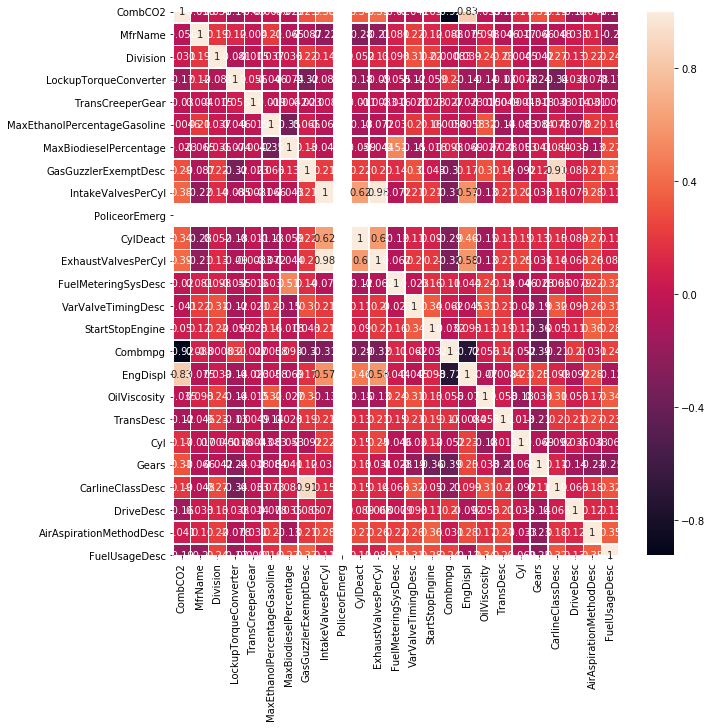

In [11]:
# Heat Map of Variables
# First we need to create a new dataframe with the variables that I would like to take a look at.

data2 = data[['CombCO2', 'MfrName', 'Division', 'LockupTorqueConverter', 'TransCreeperGear', 'MaxEthanolPercentageGasoline', 'MaxBiodieselPercentage', 'GasGuzzlerExemptDesc', 'IntakeValvesPerCyl', 'PoliceorEmerg', 'CylDeact', 'ExhaustValvesPerCyl', 'FuelMeteringSysDesc', 'VarValveTimingDesc', 'StartStopEngine', 'Combmpg','EngDispl', 'OilViscosity', 'TransDesc', 'Cyl', 'Gears', 'CarlineClassDesc', 'DriveDesc', 'AirAspirationMethodDesc', 'FuelUsageDesc']]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data2.corr(), annot=True, linewidth = .5, ax = ax)

In [12]:
# Let's calculate the VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Combmpg ~ CombCO2 + MfrName + Division + LockupTorqueConverter + TransCreeperGear + MaxEthanolPercentageGasoline + MaxBiodieselPercentage + GasGuzzlerExemptDesc + IntakeValvesPerCyl + PoliceorEmerg + CylDeact + ExhaustValvesPerCyl + VarValveTimingDesc + FuelMeteringSysDesc + StartStopEngine + EngDispl + OilViscosity + TransDesc + Cyl + Gears + CarlineClassDesc + DriveDesc + AirAspirationMethodDesc + FuelUsageDesc', data = data2, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,162.531523,Intercept
1,5.527984,CombCO2
2,1.556217,MfrName
3,1.333054,Division
4,1.299202,LockupTorqueConverter
5,1.011191,TransCreeperGear
6,1.593138,MaxEthanolPercentageGasoline
7,2.156016,MaxBiodieselPercentage
8,8.341917,GasGuzzlerExemptDesc
9,25.783804,IntakeValvesPerCyl


#### I see that the variables "IntakeValvesPerCyl" and "ExhaustValvesPerCyl" have the highest VIF scores. 
#### These will be removed from our model subsequently. 

In [13]:
# Here I will check for any empty observations in each variable that I am considering. 

data2.isna().sum()

CombCO2                         0
MfrName                         0
Division                        0
LockupTorqueConverter           0
TransCreeperGear                0
MaxEthanolPercentageGasoline    0
MaxBiodieselPercentage          0
GasGuzzlerExemptDesc            0
IntakeValvesPerCyl              0
PoliceorEmerg                   0
CylDeact                        0
ExhaustValvesPerCyl             0
FuelMeteringSysDesc             0
VarValveTimingDesc              0
StartStopEngine                 0
Combmpg                         0
EngDispl                        0
OilViscosity                    0
TransDesc                       0
Cyl                             0
Gears                           0
CarlineClassDesc                0
DriveDesc                       0
AirAspirationMethodDesc         0
FuelUsageDesc                   0
dtype: int64

In [14]:
# I will create a correlation table. This is easier to see when I have a lot of variables compared to a heat correlation map.

data2.corr()

,CombCO2,MfrName,Division,LockupTorqueConverter,TransCreeperGear,MaxEthanolPercentageGasoline,MaxBiodieselPercentage,GasGuzzlerExemptDesc,IntakeValvesPerCyl,PoliceorEmerg,...,Combmpg,EngDispl,OilViscosity,TransDesc,Cyl,Gears,CarlineClassDesc,DriveDesc,AirAspirationMethodDesc,FuelUsageDesc
CombCO2,1.000000,-0.056267,0.031142,-0.171339,-0.030258,-0.004608,-0.023255,0.294115,0.378399,NaN,...,-0.924632,0.834979,-0.035055,-0.123582,0.165349,0.306887,0.194674,-0.155900,0.041209,-0.187944
MfrName,-0.056267,1.000000,0.190643,0.115964,0.003988,0.210224,-0.064951,-0.086650,-0.218717,NaN,...,0.088305,-0.074653,0.097528,-0.045676,-0.017008,-0.065811,-0.048410,0.032920,0.100062,-0.198038
Division,0.031142,0.190643,1.000000,-0.080636,-0.015437,0.036939,0.036148,0.224120,0.138719,NaN,...,-0.000828,0.039343,0.240564,0.233544,0.004494,-0.042273,0.273280,0.125447,0.223745,0.241296
LockupTorqueConverter,-0.171339,0.115964,-0.080636,1.000000,0.055869,-0.045504,-0.074365,-0.321168,-0.085372,NaN,...,0.204985,-0.140646,-0.143910,-0.134798,0.007758,-0.241769,-0.336853,0.032970,-0.078398,-0.173426
TransCreeperGear,-0.030258,0.003988,-0.015437,0.055869,1.000000,-0.018584,-0.004155,-0.023298,-0.008072,NaN,...,0.027160,-0.023377,-0.015321,0.004879,0.000433,-0.017759,-0.033221,-0.013674,0.030765,-0.009091
MaxEthanolPercentageGasoline,-0.004608,0.210224,0.036939,-0.045504,-0.018584,1.000000,-0.346849,0.064831,-0.065748,NaN,...,0.005766,0.005803,0.323339,-0.139956,-0.082502,-0.083598,0.078410,-0.078105,0.204674,0.164054
MaxBiodieselPercentage,-0.023255,-0.064951,0.036148,-0.074365,-0.004155,-0.346849,1.000000,0.126697,-0.042560,NaN,...,0.093193,-0.069114,-0.027377,0.022749,-0.052992,0.041400,0.084090,0.034856,-0.133346,0.274992
GasGuzzlerExemptDesc,0.294115,-0.086650,0.224120,-0.321168,-0.023298,0.064831,0.126697,1.000000,0.213768,NaN,...,-0.299652,0.171872,0.301669,0.194921,-0.091910,0.124534,0.911391,0.085288,0.210494,0.365725
IntakeValvesPerCyl,0.378399,-0.218717,0.138719,-0.085372,-0.008072,-0.065748,-0.042560,0.213768,1.000000,NaN,...,-0.307200,0.567055,-0.133027,0.206267,0.223123,0.032768,0.147577,0.074731,0.276679,0.107393
PoliceorEmerg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
X1 = data.drop('Combmpg', axis = 1)
y1 = data[['Combmpg']]

In [16]:
# I will create my first model and perform Stepwise-Selection with all the models. 
# These variables will be used for our linear regression performance. 
Model1 = smf.ols('Combmpg ~ CombCO2 + MfrName + Division + LockupTorqueConverter + TransCreeperGear + MaxEthanolPercentageGasoline + MaxBiodieselPercentage + GasGuzzlerExemptDesc + IntakeValvesPerCyl + PoliceorEmerg + CylDeact + ExhaustValvesPerCyl + VarValveTimingDesc + FuelMeteringSysDesc + StartStopEngine + EngDispl + OilViscosity + TransDesc + Cyl + Gears + CarlineClassDesc + DriveDesc + AirAspirationMethodDesc + FuelUsageDesc', data2).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Combmpg   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     525.9
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:17:40   Log-Likelihood:                -2554.9
No. Observations:                1270   AIC:                             5158.
Df Residuals:                    1246   BIC:                             5281.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       49.5824      0.653     75.886      0.000      48.301      50.864
CombCO2                         -0.0607      0.001    -46.558      0.000      -0.063      -0.058
MfrName                          0.0397      0.012      3.387      0.001       0.017       0.063
Division                        -0.0020      0.005     -0.381      0.704      -0.012       0.008
LockupTorqueConverter            0.4758      0.146      3.268      0.001       0.190       0.762
TransCreeperGear                 0.5274      1.837      0.287      0.774      -3.077       4.132
MaxEthanolPercentageGasoline     0.1981      0.109      1.821      0.069      -0.015       0.412
MaxBiodieselPercentage           2.5043      0.404      6.197      0.000       1.711       3.297
GasGuzzlerExemptDesc            -1.5632      0.301     -5.190      0.000      -2.154      -0.972
IntakeValvesPerCyl               1.5930      0.980      1.626      0.104      -0.329       3.515
PoliceorEmerg                 1.032e-14   2.35e-15      4.390      0.000    5.71e-15    1.49e-14
CylDeact                         0.5063      0.210      2.408      0.016       0.094       0.919
ExhaustValvesPerCyl             -1.7001      0.955     -1.780      0.075      -3.574       0.174
VarValveTimingDesc               0.0057      0.003      2.151      0.032       0.000       0.011
FuelMeteringSysDesc              0.4491      0.096      4.665      0.000       0.260       0.638
StartStopEngine                 -1.1704      0.125     -9.329      0.000      -1.417      -0.924
EngDispl                         0.5357      0.103      5.187      0.000       0.333       0.738
OilViscosity                     0.0142      0.003      4.379      0.000       0.008       0.021
TransDesc                        0.1259      0.043      2.948      0.003       0.042       0.210
Cyl                              0.5136      0.052      9.794      0.000       0.411       0.616
Gears                           -0.4053      0.037    -10.859      0.000      -0.478      -0.332
CarlineClassDesc                 0.0542      0.019      2.897      0.004       0.017       0.091
DriveDesc                        0.1711      0.037      4.577      0.000       0.098       0.244
AirAspirationMethodDesc          0.0698      0.074      0.943      0.346      -0.075       0.215
FuelUsageDesc                    0.1888      0.085      2.220      0.027       0.022       0.356
==============================================================================
Omnibus:                      966.042   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23656.928
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      23.085   Cond. No.  

In [17]:
Model2 = smf.ols('Combmpg ~ CombCO2 + MfrName + LockupTorqueConverter  + MaxBiodieselPercentage + GasGuzzlerExemptDesc + CylDeact + FuelMeteringSysDesc +  StartStopEngine + OilViscosity + TransDesc + Cyl + Gears + DriveDesc + CarlineClassDesc + FuelUsageDesc', data2).fit()
Model2.summary()
# I notice that all these variables are significant. Our R-Squared Adjusted dropped. 
# This is because we eliminated variables that had relatively high correlations amongst each other. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Combmpg   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     774.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:17:41   Log-Likelihood:                -2581.8
No. Observations:                1270   AIC:                             5196.
Df Residuals:                    1254   BIC:                             5278.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 47.6741      0.595     80.085      0.000      46.506      48.842
CombCO2                   -0.0548      0.001    -74.840      0.000      -0.056      -0.053
MfrName                    0.0538      0.011      5.096      0.000       0.033       0.074
LockupTorqueConverter      0.4845      0.146      3.308      0.001       0.197       0.772
MaxBiodieselPercentage     1.5696      0.349      4.498      0.000       0.885       2.254
GasGuzzlerExemptDesc      -1.8836      0.294     -6.413      0.000      -2.460      -1.307
CylDeact                   0.9678      0.184      5.273      0.000       0.608       1.328
FuelMeteringSysDesc        0.6106      0.091      6.708      0.000       0.432       0.789
StartStopEngine           -1.0861      0.122     -8.926      0.000      -1.325      -0.847
OilViscosity               0.0148      0.003      4.696      0.000       0.009       0.021
TransDesc                  0.1413      0.041      3.452      0.001       0.061       0.222
Cyl                        0.5205      0.051     10.115      0.000       0.420       0.621
Gears                     -0.4032      0.037    -10.925      0.000      -0.476      -0.331
DriveDesc                  0.1714      0.038      4.529      0.000       0.097       0.246
CarlineClassDesc           0.0687      0.018      3.718      0.000       0.032       0.105
FuelUsageDesc              0.3204      0.080      4.006      0.000       0.163       0.477
==============================================================================
Omnibus:                     1019.055   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29066.360
Skew:                           3.523   Prob(JB):                         0.00
Kurtosis:                      25.352   Cond. No.                     5.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

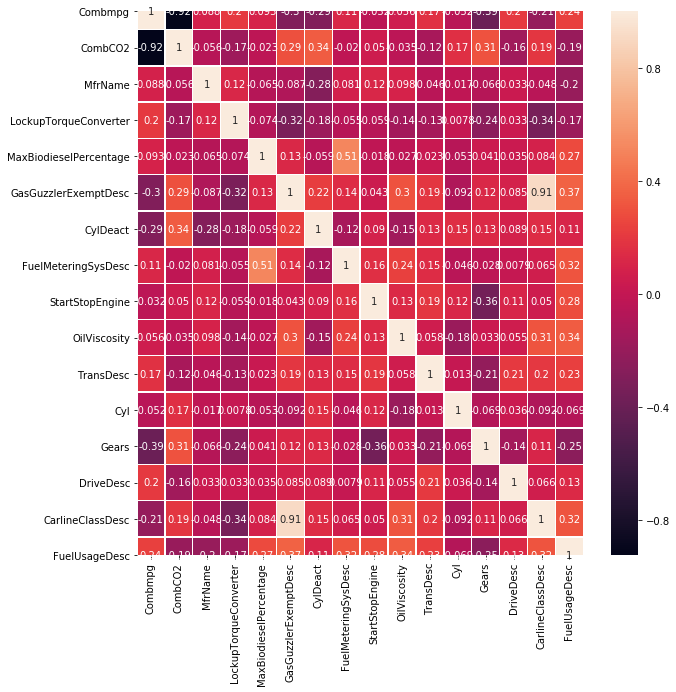

In [38]:
# This heat map shows only the variables that do not have high correlations and also no missing values.
data3 = data2[['Combmpg', 'CombCO2', 'MfrName' , 'LockupTorqueConverter' , 'MaxBiodieselPercentage' , 'GasGuzzlerExemptDesc' , 'CylDeact' , 'FuelMeteringSysDesc', 'StartStopEngine', 'OilViscosity', 'TransDesc' , 'Cyl', 'Gears' , 'DriveDesc', 'CarlineClassDesc' ,'FuelUsageDesc']]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data3.corr(), annot=True, linewidth = .5, ax = ax)

In [19]:
# Let's calculate the VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Combmpg ~ CombCO2 + MfrName + LockupTorqueConverter  + MaxBiodieselPercentage + GasGuzzlerExemptDesc + CylDeact + FuelMeteringSysDesc +  StartStopEngine + OilViscosity + TransDesc + Cyl + Gears + DriveDesc + CarlineClassDesc + FuelUsageDesc', data = data3, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,130.154945,Intercept
1,1.682421,CombCO2
2,1.218347,MfrName
3,1.267825,LockupTorqueConverter
4,1.550753,MaxBiodieselPercentage
5,7.652637,GasGuzzlerExemptDesc
6,1.462750,CylDeact
7,1.682979,FuelMeteringSysDesc
8,1.401467,StartStopEngine
9,1.457634,OilViscosity


In [20]:
# This last final model is what will be considered up for split-testing. 
Model3 = smf.ols('Combmpg ~ CombCO2 + MfrName + LockupTorqueConverter  + MaxBiodieselPercentage + GasGuzzlerExemptDesc + CylDeact + FuelMeteringSysDesc +  StartStopEngine + OilViscosity + TransDesc + Cyl + Gears + DriveDesc + FuelUsageDesc + CarlineClassDesc', data3).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Combmpg   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     774.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:17:44   Log-Likelihood:                -2581.8
No. Observations:                1270   AIC:                             5196.
Df Residuals:                    1254   BIC:                             5278.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 47.6741      0.595     80.085      0.000      46.506      48.842
CombCO2                   -0.0548      0.001    -74.840      0.000      -0.056      -0.053
MfrName                    0.0538      0.011      5.096      0.000       0.033       0.074
LockupTorqueConverter      0.4845      0.146      3.308      0.001       0.197       0.772
MaxBiodieselPercentage     1.5696      0.349      4.498      0.000       0.885       2.254
GasGuzzlerExemptDesc      -1.8836      0.294     -6.413      0.000      -2.460      -1.307
CylDeact                   0.9678      0.184      5.273      0.000       0.608       1.328
FuelMeteringSysDesc        0.6106      0.091      6.708      0.000       0.432       0.789
StartStopEngine           -1.0861      0.122     -8.926      0.000      -1.325      -0.847
OilViscosity               0.0148      0.003      4.696      0.000       0.009       0.021
TransDesc                  0.1413      0.041      3.452      0.001       0.061       0.222
Cyl                        0.5205      0.051     10.115      0.000       0.420       0.621
Gears                     -0.4032      0.037    -10.925      0.000      -0.476      -0.331
DriveDesc                  0.1714      0.038      4.529      0.000       0.097       0.246
FuelUsageDesc              0.3204      0.080      4.006      0.000       0.163       0.477
CarlineClassDesc           0.0687      0.018      3.718      0.000       0.032       0.105
==============================================================================
Omnibus:                     1019.055   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29066.360
Skew:                           3.523   Prob(JB):                         0.00
Kurtosis:                      25.352   Cond. No.                     5.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here I will create scatterplots for all variables that have high correlation. I want to see what kind of relationships they have 
#### with each other. 

Text(0.5, 1.0, 'Scatterplot for Combmpg vs EngDispl')

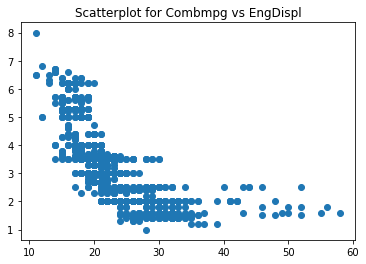

In [21]:
plt.scatter(data2['Combmpg'],data2['EngDispl']);
plt.title('Scatterplot for Combmpg vs EngDispl')

Text(0.5, 1.0, 'Scatterplot for Combmpg vs CombCO2')

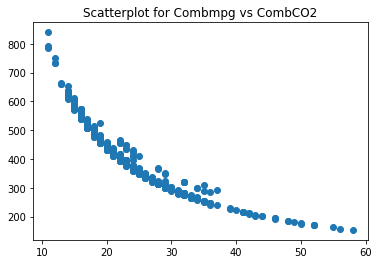

In [22]:
plt.scatter(data3['Combmpg'],data3['CombCO2']);
plt.title('Scatterplot for Combmpg vs CombCO2')

Text(0.5, 1.0, 'Scatterplot of IntakeValvesPerCyl vs ExhaustValvesPerCyl')

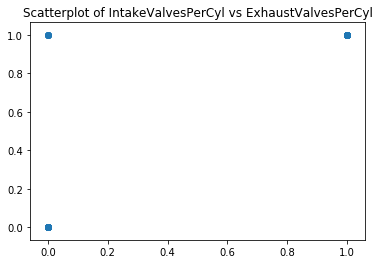

In [23]:
plt.scatter(data2['IntakeValvesPerCyl'],data2['ExhaustValvesPerCyl']);
plt.title('Scatterplot of IntakeValvesPerCyl vs ExhaustValvesPerCyl')

Text(0.5, 1.0, 'Scatterplot of CylDeact vs IntakeVavlesPerCyl')

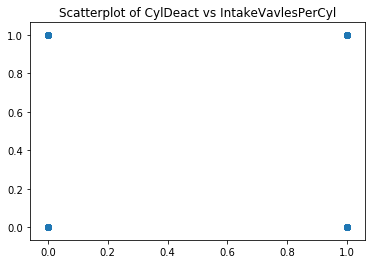

In [24]:
plt.scatter(data2['CylDeact'],data2['IntakeValvesPerCyl']);
plt.title('Scatterplot of CylDeact vs IntakeVavlesPerCyl')

#### I will initally split the data using ALL variables. I will test the performance on all the models shown below. 

In [25]:
#Create our X and Y values. 
# We took out Police or Emerg because it is not useful for our model since it does not provide us with a correlation. 
# Also took out Exhasut and Intakevalve Cyl because they have really high correlation values. 
predictors = ['CombCO2', 'MfrName', 'Division', 'LockupTorqueConverter', 'TransCreeperGear', 'MaxEthanolPercentageGasoline', 'MaxBiodieselPercentage', 'GasGuzzlerExemptDesc', 'CylDeact', 'FuelMeteringSysDesc', 'VarValveTimingDesc', 'StartStopEngine', 'EngDispl', 'OilViscosity', 'TransDesc', 'Cyl', 'Gears', 'CarlineClassDesc', 'DriveDesc', 'AirAspirationMethodDesc', 'FuelUsageDesc']
X = pd.DataFrame(data2[predictors].copy())
y = data2['Combmpg'].copy()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
# Let's test out Linear Regression! 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)

lr.score(X_train, y_train)

from sklearn.metrics import r2_score
print("The accuracy of my linear model is:", round (r2_score(y_test, ypred)*100, 2), "percent")

The accuracy of my linear model is: 90.38 percent


In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

ypred_dtr = dtr.predict(X_test)
print('Accuracy of the decision tree model is:', round(r2_score(y_test, ypred_dtr)*100, 2), "percent")

Accuracy of the decision tree model is: 99.36 percent


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, random_state = 0)
rfr.fit(X_train, y_train)

ypred_rfr = rfr.predict(X_test)
print('Accuracy of the random forest model:', round(r2_score(y_test, ypred_rfr)*100, 2), "percent")

Accuracy of the random forest model: 99.54 percent


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)
ypred_gbr = gbr.predict(X_test)
print('Accuracy of Grandient Boosting Regressior is:', round(r2_score(y_test, ypred_gbr)*100, 2), "percent" )

Accuracy of Grandient Boosting Regressior is: 99.66 percent


In [31]:
feature_importance = gbr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)

TransCreeperGear                 0.000000
GasGuzzlerExemptDesc             0.000000
Cyl                              0.000002
StartStopEngine                  0.000077
CylDeact                         0.000113
AirAspirationMethodDesc          0.000152
LockupTorqueConverter            0.000180
Gears                            0.000861
TransDesc                        0.001043
DriveDesc                        0.002030
Division                         0.002564
OilViscosity                     0.003268
CarlineClassDesc                 0.003627
MfrName                          0.007073
EngDispl                         0.016689
VarValveTimingDesc               0.029013
FuelUsageDesc                    0.152712
MaxEthanolPercentageGasoline     0.222106
MaxBiodieselPercentage           0.235727
FuelMeteringSysDesc              0.254783
CombCO2                         99.067982
dtype: float64


#### I will now split the data using a subset of variables from previously Backwards-Selection steps. 

In [32]:
#From the above, PoliceorEmerg doesn't even give us a correlation value. 
predictors = ['CombCO2', 'MfrName' , 'LockupTorqueConverter' , 'MaxBiodieselPercentage' , 'GasGuzzlerExemptDesc' , 'CylDeact' , 'FuelMeteringSysDesc', 'StartStopEngine', 'OilViscosity', 'TransDesc' , 'Cyl', 'Gears' , 'DriveDesc', 'FuelUsageDesc']
X = pd.DataFrame(data3[predictors].copy())
y = data3['Combmpg'].copy()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)

lr.score(X_train, y_train)

from sklearn.metrics import r2_score
print("The accuracy of my linear model is:", round (r2_score(y_test, ypred)*100, 2), "percent")

The accuracy of my linear model is: 89.48 percent


In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

ypred_dtr = dtr.predict(X_test)
print('Accuracy of the decision tree model is:', round(r2_score(y_test, ypred_dtr)*100, 2), "percent")

Accuracy of the decision tree model is: 99.47 percent


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, random_state = 0)
rfr.fit(X_train, y_train)

ypred_rfr = rfr.predict(X_test)
print('Accuracy of the random forest model:', round(r2_score(y_test, ypred_rfr)*100, 2), "percent")

Accuracy of the random forest model: 99.58 percent


In [37]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)
ypred_gbr = gbr.predict(X_test)
print('Accuracy of Grandient Boosting Regressior is:', round(r2_score(y_test, ypred_gbr)*100, 2), "percent" )

Accuracy of Grandient Boosting Regressior is: 99.67 percent
